In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict
from sklearn.decomposition import PCA
from itertools import product

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
df_train = pd.read_csv("./Train_NOoutliers")
df_train = df_train.drop(columns=['Unnamed: 0'], axis = 1)
df_train = df_train.drop(columns=['outlier_detection'], axis = 1)
df_test = pd.read_csv("./Test_ripulito (1)")
df_test = df_test.drop(columns=['Unnamed: 0'], axis = 1)

In [3]:
encoder= LabelEncoder()
encoder.fit(df_train["emotion"])

keys= encoder.classes_
values= encoder.transform(encoder.classes_)
dictionary = dict(zip(keys, values))

dictionary

{'angry': 0,
 'calm': 1,
 'disgust': 2,
 'fearful': 3,
 'happy': 4,
 'neutral': 5,
 'sad': 6,
 'surprised': 7}

In [4]:
df_train["emotion"]= encoder.transform(df_train["emotion"])
df_test["emotion"]= encoder.transform(df_test["emotion"])

In [5]:
y_train = df_train.emotion
df_train = df_train.drop("emotion", axis=1)
X_train = df_train.drop(columns=['vocal_channel', 'emotional_intensity', 'statement', 'repetition', 'sex', 'filename'], axis = 1)
y_test = df_test.emotion
df_test = df_test.drop("emotion", axis=1)
X_test = df_test.drop(columns=['vocal_channel', 'emotional_intensity', 'statement', 'repetition', 'sex', 'filename'], axis = 1)


In [6]:
df_train

vocal_channel emotional_intensity                     statement  \
0           speech              normal  Kids are talking by the door   
1           speech              normal  Kids are talking by the door   
2           speech              normal  Dogs are sitting by the door   
3           speech              normal  Dogs are sitting by the door   
4           speech              normal  Kids are talking by the door   
...            ...                 ...                           ...   
1804        speech              normal  Dogs are sitting by the door   
1805        speech              strong  Kids are talking by the door   
1806        speech              strong  Kids are talking by the door   
1807        speech              strong  Dogs are sitting by the door   
1808        speech              strong  Dogs are sitting by the door   

     repetition sex                  filename       sum       std       q25  \
0           1st   M  03-01-01-01-01-01-01.wav  0.145081  0.004001 -0.000031   
1           2nd   M  03-01-01-01-01-02-01.wav  0.114319  0.004283 -0.000031   
2           1st   M  03-01-01-01-02-01-01.wav  0.149963  0.005084  0.000000   
3           2nd   M  03-01-01-01-02-02-01.wav  0.139618  0.004886 -0.000031   
4           1st   M  03-01-02-01-01-01-01.wav  0.137665  0.002956 -0.000031   
...         ...  ..                       ...       ...       ...       ...   
1804        2nd   F  03-01-08-01-02-02-18.wav -0.154480  0.005399  0.000000   
1805        1st   F  03-01-08-02-01-01-18.wav -0.139679  0.008788 -0.000031   
1806        2nd   F  03-01-08-02-01-02-18.wav -0.210968  0.009933  0.000000   
1807        1st   F  03-01-08-02-02-01-18.wav -0.085876  0.012221 -0.000031   
1808        2nd   F  03-01-08-02-02-02-18.wav -0.195312  0.009659 -0.000031   

      q50  ...     sc_q25_w4  sc_kur_w4  sc_skew_w4  stft_sum_w4  \
0     0.0  ...  10439.979745  25.150642   -4.175609   740.409892   
1     0.0  ...   9721.736881  -0.096686   -1.100390   705.975006   
2     0.0  ...   9711.644575  16.082550   -3.120218   694.365924   
3     0.0  ...   8998.702287  -0.332682   -0.880988   663.205667   
4     0.0  ...   9178.275961   0.054656   -1.071109   741.412796   
...   ...  ...           ...        ...         ...          ...   
1804  0.0  ...   8504.050807   0.904699   -1.472070   660.790616   
1805  0.0  ...   7511.014887   0.947101   -1.301303   634.120979   
1806  0.0  ...   7559.625245   2.505409   -1.472613   631.801688   
1807  0.0  ...   7603.873380  -0.020476   -1.160818   680.117724   
1808  0.0  ...   6566.209110  -0.369996   -0.454012   641.287028   

      stft_mean_w4  stft_std_w4  stft_min_w4  stft_q95_w4  stft_kur_w4  \
0         0.791036     0.155455     0.000000          1.0     6.742190   
1         0.744699     0.163183     0.270133          1.0    -0.700420   
2         0.751478     0.190634     0.000000          1.0     1.688986   
3         0.736895     0.182551     0.205616          1.0    -0.594111   
4         0.744390     0.177069     0.177847          1.0     0.126535   
...            ...          ...          ...          ...          ...   
1804      0.663444     0.294603     0.000000          1.0     0.262900   
1805      0.614458     0.323299     0.000000          1.0    -0.857759   
1806      0.634339     0.288322     0.000000          1.0    -0.656632   
1807      0.622818     0.323022     0.000000          1.0    -0.499022   
1808      0.621402     0.267852     0.000000          1.0    -0.962943   

      stft_skew_w4  
0        -1.706215  
1        -0.201495  
2        -1.024773  
3        -0.412871  
4        -0.620782  
...            ...  
1804     -1.051814  
1805     -0.608583  
1806     -0.586954  
1807     -0.849045  
1808     -0.276517  

[1809 rows x 203 columns]

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
params = {
    'criterion' : ["gini", "entropy", "log_loss"],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20]
}

clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4230769230769231
F1-score [0.54961832 0.57831325 0.41860465 0.33587786 0.30851064 0.24242424
 0.22666667 0.44827586]
              precision    recall  f1-score   support

           0       0.43      0.75      0.55        96
           1       0.47      0.75      0.58        96
           2       0.47      0.38      0.42        48
           3       0.63      0.23      0.34        96
           4       0.32      0.30      0.31        96
           5       0.44      0.17      0.24        48
           6       0.31      0.18      0.23        96
           7       0.38      0.54      0.45        48

    accuracy                           0.42       624
   macro avg       0.43      0.41      0.39       624
weighted avg       0.43      0.42      0.39       624



RandomForestClassifier(criterion='log_loss', min_samples_leaf=10,
                       min_samples_split=5)


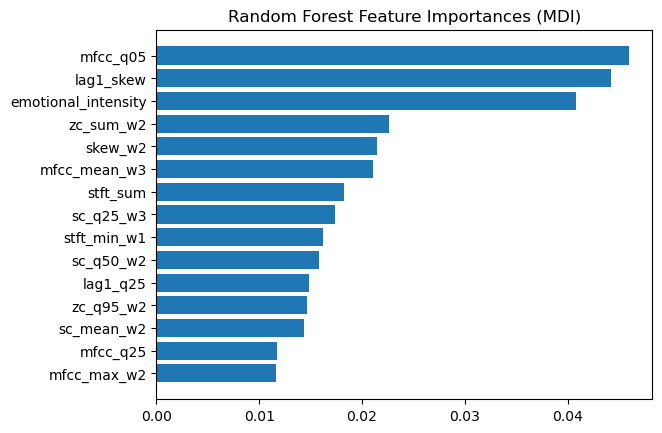

In [9]:
nbr_features = 15

print(clf)
tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train.columns)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [10]:
from sklearn.inspection import permutation_importance

In [11]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

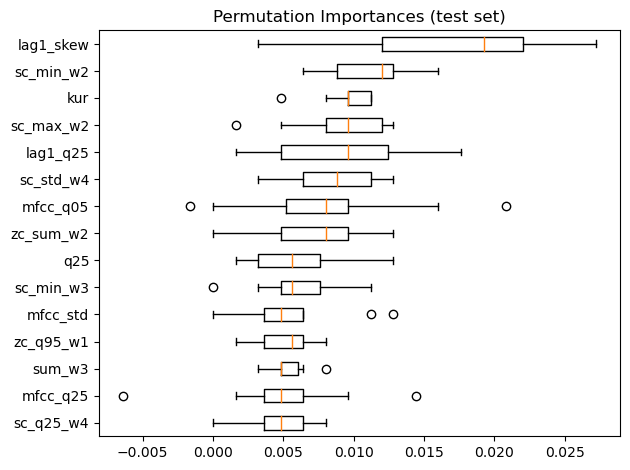

In [12]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(df_train.columns)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

In [13]:
from sklearn.tree import plot_tree

In [14]:
clf.estimators_[0]

DecisionTreeClassifier(criterion='log_loss', max_features='sqrt',
                       min_samples_leaf=10, min_samples_split=5,
                       random_state=1718689417)

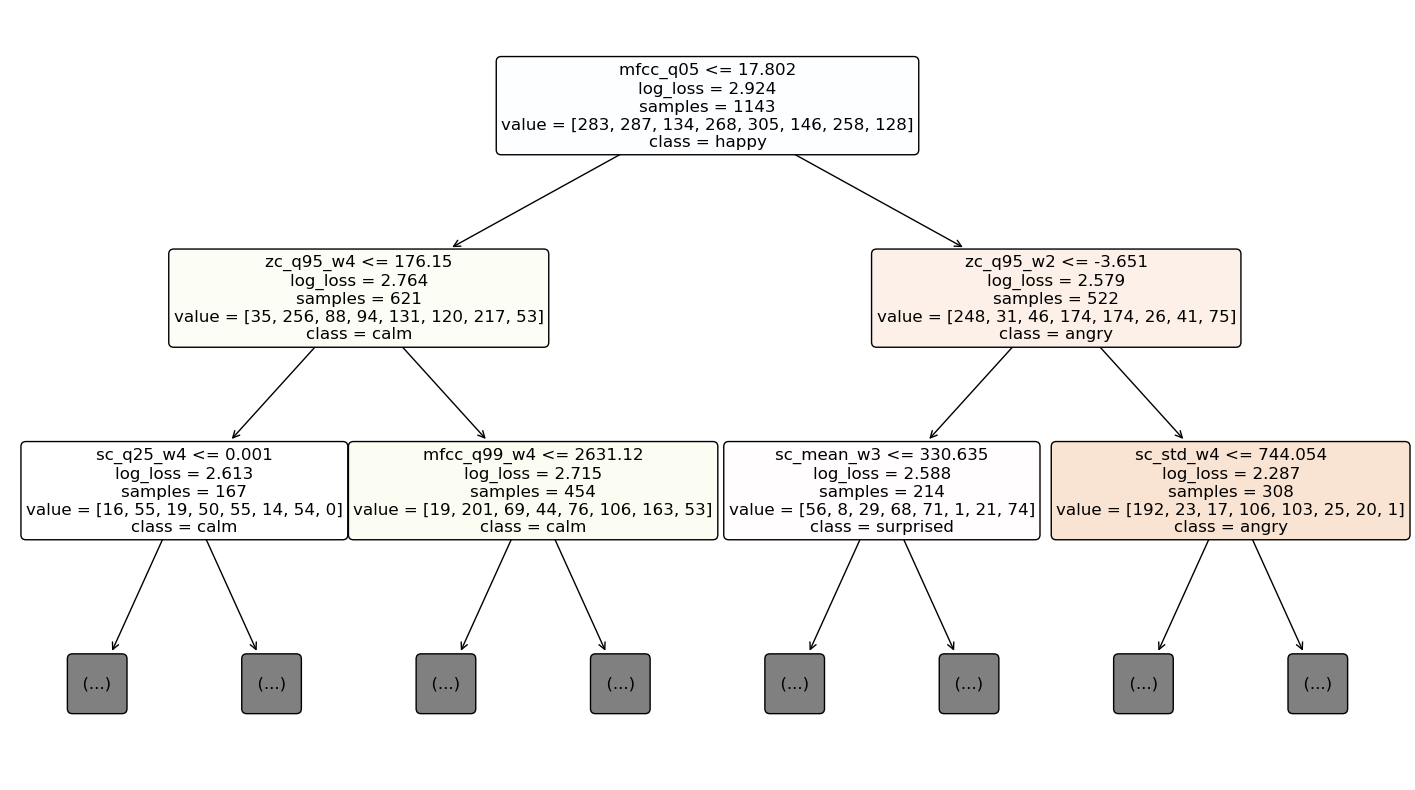

In [15]:
plt.figure(figsize=(18,10))
plot_tree(clf.estimators_[0], 
          feature_names=df_train.columns, 
          class_names=keys, 
          filled=True, 
          rounded=True,
          fontsize=12,
          max_depth=2)  
plt.show()

In [16]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [17]:
bag = BaggingClassifier(base_estimator=clf, n_estimators=100, 
                        random_state=0)
bag.fit(X_train, y_train)

y_pred =bag.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

c:\Users\Alex\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy 0.4182692307692308
F1-score [0.55813953 0.57028112 0.37333333 0.29850746 0.33846154 0.10714286
 0.26993865 0.44067797]
              precision    recall  f1-score   support

           0       0.44      0.75      0.56        96
           1       0.46      0.74      0.57        96
           2       0.52      0.29      0.37        48
           3       0.53      0.21      0.30        96
           4       0.33      0.34      0.34        96
           5       0.38      0.06      0.11        48
           6       0.33      0.23      0.27        96
           7       0.37      0.54      0.44        48

    accuracy                           0.42       624
   macro avg       0.42      0.40      0.37       624
weighted avg       0.42      0.42      0.38       624



In [18]:
from sklearn.ensemble import AdaBoostClassifier

In [19]:
ada = AdaBoostClassifier(base_estimator=clf, n_estimators=100, random_state=0)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

c:\Users\Alex\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy 0.4775641025641026
F1-score [0.60344828 0.56353591 0.49541284 0.36734694 0.41052632 0.40506329
 0.41747573 0.48076923]
              precision    recall  f1-score   support

           0       0.51      0.73      0.60        96
           1       0.60      0.53      0.56        96
           2       0.44      0.56      0.50        48
           3       0.53      0.28      0.37        96
           4       0.41      0.41      0.41        96
           5       0.52      0.33      0.41        48
           6       0.39      0.45      0.42        96
           7       0.45      0.52      0.48        48

    accuracy                           0.48       624
   macro avg       0.48      0.48      0.47       624
weighted avg       0.49      0.48      0.47       624



In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

params = {
    'learning_rate' : [0.1, 0.5, 1],
    'max_depth' : [3, 5, 7],
    'min_samples_split' : [10, 50, 100]
}

clf = GradientBoostingClassifier(n_estimators=100, random_state=0)
grid = RandomizedSearchCV(clf, params, scoring='accuracy')
grid.fit(X_train, y_train)
clf = grid.best_estimator_
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.72      0.61        96
           1       0.57      0.60      0.59        96
           2       0.53      0.44      0.48        48
           3       0.48      0.28      0.36        96
           4       0.29      0.39      0.33        96
           5       0.47      0.40      0.43        48
           6       0.31      0.27      0.29        96
           7       0.43      0.42      0.43        48

    accuracy                           0.44       624
   macro avg       0.45      0.44      0.44       624
weighted avg       0.45      0.44      0.44       624



In [22]:
print(clf)
from xgboost import XGBClassifier

GradientBoostingClassifier(max_depth=7, min_samples_split=100, random_state=0)


In [28]:
params = {
    'learning_rate' : [0.1, 0.5, 1],
    'gamma' : [0.1, 0.5, 1],
    'tree_method' : ['exact', 'approx']
}

clf = XGBClassifier(objective='multi:softmax', 
                    num_class=8,
                    max_depth = 6,
                    reg_lambda = 1,
                    use_label_encoder=False,
                    random_state=42
                   )
grid = RandomizedSearchCV(clf, params, scoring= 'accuracy')
grid.fit(X_train, y_train)
clf = grid.best_estimator_
y_pred = clf.predict(X_test)

print(clf)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

c:\Users\Alex\anaconda3\envs\myenv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Alex\anaconda3\envs\myenv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Alex\anaconda3\envs\myenv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Alex\anaconda3\envs\myenv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Alex\anaconda3\envs\myenv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\A

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=8,
              num_parallel_tree=None, objective='multi:softmax', ...)
Accuracy 0.44711538461538464
F1-score [0.60655738 0.56684492 0.5        0.36601307 0.32835821 0.38356164
 0.34170854 0.4       ]
              precision    recall  f1-score   support

           0       0.50      0.77      0.61        96
          

In [24]:
#!pip install lightgbm
from lightgbm import LGBMClassifier

In [29]:
params = {
    'boosting_type' : ['gbdt', 'goss', 'dart'],
    'reg_alpha' : [0.001, 0.01, 0.1, 0],
    'reg_lambda' : [0.001, 0.01, 0.1, 0]
}

clf = LGBMClassifier(boosting_type='gbdt',  #'goss', #'dart'
                     max_depth=-1, # no limit
                     num_leaves=31,
                     n_estimators=100,
                     subsample_for_bin=200000,
                     objective='multiclass',
                     reg_alpha=0.0, #L1 regularization term on weights
                     reg_lambda=0.0, #L2 regularization term on weights
                     random_state=42
                   )
grid = RandomizedSearchCV(clf, params, scoring= 'accuracy')
grid.fit(X_train, y_train)
clf = grid.best_estimator_

y_pred = clf.predict(X_test)

print(clf)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

LGBMClassifier(boosting_type='goss', objective='multiclass', random_state=42,
               reg_alpha=0.001, reg_lambda=0)
Accuracy 0.46634615384615385
F1-score [0.625      0.52910053 0.4893617  0.41463415 0.42105263 0.45333333
 0.32978723 0.38202247]
              precision    recall  f1-score   support

           0       0.52      0.78      0.62        96
           1       0.54      0.52      0.53        96
           2       0.50      0.48      0.49        48
           3       0.50      0.35      0.41        96
           4       0.39      0.46      0.42        96
           5       0.63      0.35      0.45        48
           6       0.34      0.32      0.33        96
           7       0.41      0.35      0.38        48

    accuracy                           0.47       624
   macro avg       0.48      0.45      0.46       624
weighted avg       0.47      0.47      0.46       624



In [26]:
#!pip install catboost
from catboost import CatBoostClassifier

In [27]:
clf = CatBoostClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Learning rate set to 0.081555
0:	learn: 2.0409355	total: 300ms	remaining: 4m 59s
1:	learn: 2.0016775	total: 430ms	remaining: 3m 34s
2:	learn: 1.9657848	total: 560ms	remaining: 3m 6s
3:	learn: 1.9296681	total: 696ms	remaining: 2m 53s
4:	learn: 1.8968910	total: 822ms	remaining: 2m 43s
5:	learn: 1.8616769	total: 947ms	remaining: 2m 36s
6:	learn: 1.8282566	total: 1.08s	remaining: 2m 33s
7:	learn: 1.7980978	total: 1.2s	remaining: 2m 29s
8:	learn: 1.7685438	total: 1.33s	remaining: 2m 26s
9:	learn: 1.7432474	total: 1.45s	remaining: 2m 23s
10:	learn: 1.7173874	total: 1.58s	remaining: 2m 21s
11:	learn: 1.7000986	total: 1.75s	remaining: 2m 23s
12:	learn: 1.6847723	total: 1.9s	remaining: 2m 24s
13:	learn: 1.6637836	total: 2.02s	remaining: 2m 22s
14:	learn: 1.6434149	total: 2.14s	remaining: 2m 20s
15:	learn: 1.6194508	total: 2.27s	remaining: 2m 19s
16:	learn: 1.5991024	total: 2.39s	remaining: 2m 18s
17:	learn: 1.5789839	total: 2.52s	remaining: 2m 17s
18:	learn: 1.5660768	total: 2.65s	remaining: 2m